This notebook is for: 
1. curating data on M.tb AMR variants, as compiled in Elizabeth Garret's master list, and NEJM.
2. analyzing AMR loci in in-house sequenced M.tb isolates

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read depths summary stats

41 sequenced M.tb isolates

In [28]:
summstats = pd.read_csv('/Users/yeemayseah/Documents/Repos/mtb_amr/sequenced/output/variants/amr_covsummstats_H37Rv.csv')

#### Minimum read depths, all isolates

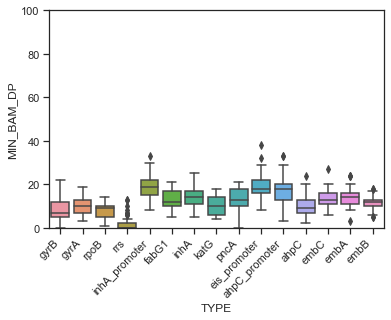

In [24]:
# https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html
sns.set_theme(style="ticks", palette="pastel")
chart = sns.boxplot(data=summstats, x="TYPE", y="MIN_BAM_DP")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment='right')
chart.set_ylim(0,100)
plt.show()

In [39]:
# Are low MIN_BAM_DP for rpoB and low pncA in the same isolate?
min(summstats[summstats.TYPE == 'rpoB'].MIN_BAM_DP)

1

In [41]:
summstats[(summstats.TYPE == 'rpoB') & (summstats.MIN_BAM_DP == 1)]

,SAMPLE,POS,TYPE,MIN_BAM_DP,MAX_BAM_DP,BAM_DP,SD_BAM_DP,1QT_BAM_DP,MED_BAM_DP,3QT_BAM_DP
302,1129-705-503,759807,rpoB,1,51,22,9.4,16.0,22.0,28.0


In [40]:
min(summstats[summstats.TYPE == 'pncA'].MIN_BAM_DP)

0

In [42]:
summstats[(summstats.TYPE == 'pncA') & (summstats.MIN_BAM_DP == 0)]

,SAMPLE,POS,TYPE,MIN_BAM_DP,MAX_BAM_DP,BAM_DP,SD_BAM_DP,1QT_BAM_DP,MED_BAM_DP,3QT_BAM_DP
278,1128-714-506,2288681,pncA,0,34,21,7.07,15.0,22.0,27.0


#### Median read depths, all isolates

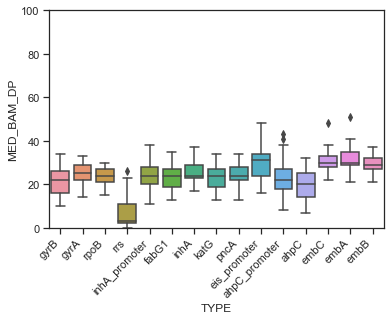

In [25]:
sns.set_theme(style="ticks", palette="pastel")
chart = sns.boxplot(data=summstats, x="TYPE", y="MED_BAM_DP")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment='right')
chart.set_ylim(0,100)
plt.show()

#### Maximum read depths, all isolates

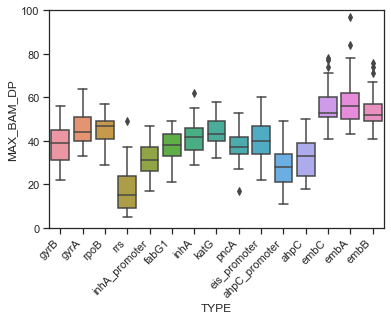

In [26]:
sns.set_theme(style="ticks", palette="pastel")
chart = sns.boxplot(data=summstats, x="TYPE", y="MAX_BAM_DP")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment='right')
chart.set_ylim(0,100)
plt.show()

### Generate AMR bed file

In [32]:
ahpc_pr = pd.read_csv('amr_sites/masterlist_ahpc_promoter.csv')
eis_pr = pd.read_csv('amr_sites/masterlist_eis_promoter.csv')
embb = pd.read_csv('amr_sites/masterlist_embb.csv')
gyra = pd.read_csv('amr_sites/masterlist_gyra.csv')
gyrb = pd.read_csv('amr_sites/masterlist_gyrb.csv')
inha_pr = pd.read_csv('amr_sites/masterlist_inha_promoter.csv')
katg = pd.read_csv('amr_sites/masterlist_katg.csv')
pnca = pd.read_csv('amr_sites/masterlist_pnca.csv')
rpob = pd.read_csv('amr_sites/masterlist_rpob.csv')
rrs = pd.read_csv('amr_sites/masterlist_rrs.csv')

In [33]:
ahpc_pr.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)
ahpc_pr['Locus'] = 'ahpC promoter'
# promoter gffStart and gffEnd inferred from GenBank file
ahpc_pr['gffStart'] = 2726088
ahpc_pr['gffEnd'] = 2726192

In [35]:
eis_pr.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)
eis_pr['Locus'] = 'eis promoter'
# promoter gffStart and gffEnd inferred from GenBank file
eis_pr['gffStart'] = 2713785
eis_pr['gffEnd'] = 2714123

In [37]:
embb.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)
embb['Locus'] = 'embB'
embb['gffStart'] = 4246514
embb['gffEnd'] = 4249810

In [39]:
gyra.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)
gyra['Locus'] = 'gyrA'
gyra['gffStart'] = 7302
gyra['gffEnd'] = 9818

In [41]:
gyrb.drop(['Support', 'Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)
gyrb['Locus'] = 'gyrB'
gyrb['gffStart'] = 5240
gyrb['gffEnd'] = 7267

In [43]:
inha_pr.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)
inha_pr['Locus'] = 'inhA promoter'
# promoter gffStart and gffEnd inferred from GenBank file
inha_pr['gffStart'] = 1673300
inha_pr['gffEnd'] = 1673439

In [45]:
katg.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)
katg['Locus'] = 'katG'
katg['gffStart'] = 2153889
katg['gffEnd'] = 2156111

In [47]:
pnca.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)
pnca['Locus'] = 'pncA'
pnca['gffStart'] = 2288681
pnca['gffEnd'] = 2289241

In [49]:
rpob.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)
rpob['Locus'] = 'rpoB'
rpob['gffStart'] = 759807
rpob['gffEnd'] = 763325

In [53]:
rrs.drop(['Support', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)
rrs['Locus'] = 'rrs'
rrs['gffStart'] = 1471846
rrs['gffEnd'] = 1473382

In [55]:
masterlist = pd.concat([ahpc_pr, eis_pr, embb, gyra, gyrb, inha_pr, katg, pnca, rpob, rrs], ignore_index=True)

In [79]:
masterlist.dropna(subset=['Mutation'], inplace=True)

In [80]:
masterlist

,Mutation,Phenotype,Category,Locus,gffStart,gffEnd
0,c-10t,INH,B,ahpC promoter,2726088,2726192
1,c-12t,INH,B,ahpC promoter,2726088,2726192
2,c-39t,INH,B,ahpC promoter,2726088,2726192
3,g-48a,INH,B,ahpC promoter,2726088,2726192
4,g-6a,INH,B,ahpC promoter,2726088,2726192
...,...,...,...,...,...,...
2142,g628c,STR,C,rrs,1471846,1473382
2143,ins1062c,STR,C,rrs,1471846,1473382
2144,t1239c,STR,D,rrs,1471846,1473382
2145,t1239c,STR,D,rrs,1471846,1473382


In [89]:
h37rv_coordinates = {'ahpc_pr_gff': (2726088, 2726192),
                     'ahpc_gff': (2726193, 2726780),
                     'eis_pr_gff': (2713785, 2714123),
                     'emba_gff': (4243233, 4246517),
                     'embb_gff': (4246514, 4249810),
                     'embc_gff': (4239863, 4243147),
                     'gyra_gff': (7302, 9818),
                     'gyrb_gff': (5240, 7267),
                     'inha_pr_gff': (1673300, 1673439),
                     'fabg1_gff': (1673440, 1674183),
                     'inha_gff': (1674202, 1675011),
                     'katg_gff': (2153889, 2156111),
                     'pnca_gff': (2288681, 2289241),
                     'rpob_gff': (759807, 763325), 
                     'rrs_gff': (1471846, 1473382)}

In [90]:
h37ra_coord = {'ahpc_pr_gff': (2739087, 2739356),
               'ahpc_gff': (2739357, 2739944),
               'eis_pr_gff': (2727288, 2728514),
               'emba_gff': (4257811, 4261095),
               'embb_gff': (4261092, 4264388),
               'embc_gff': (4254441, 4257725),
               'gyra_gff': (7302, 9818),
               'gyrb_gff': (5240, 7267),
               'fabg1_gff': (1675011, 1675754),
               'katg_gff': (2164986, 2167208),
               'pnca_gff': (2299779, 2300339),
               'rpob_gff': (761167, 764685),
               'rrs_gff': (1473213, 1474744)}

In [8]:
amr_bed = pd.read_csv('/Users/yeemayseah/Documents/Repos/mtb_amr/data/CP016972.1_amr.bed', sep='\t', header=None)

In [9]:
amr_bed[3] = 'AMR'
amr_bed[4] = 0
amr_bed[5] = '.'

In [11]:
amr_bed.to_csv('/Users/yeemayseah/Documents/Repos/mtb_amr/data/CP016972.1_amr-edit.bed', sep='\t', header=False, index=False)

## Create manifest.csv from Excel sheet

In [51]:
mtb_isolates = pd.read_excel('/Users/yeemayseah/Documents/Repos/mtb_amr/sequenced/MTB isolate tracking_LC.xlsx', sheet_name=0)

In [52]:
mtb_isolates.drop(['Sub_date', 'Heat_date', 'Ster_check', 'Patient#', 'Patient', 'Acc#', 'Comments', 'Library', 'Lib Quant ng/uL', 'Pool'], axis=1, inplace=True)

In [53]:
mtb_isolates.dropna(inplace=True)

In [54]:
mtb_isolates['label'] = 'M' + mtb_isolates['Mtb#'].astype(int).astype(str)
mtb_isolates['run_number'] = mtb_isolates['Seq_run'].astype(int)

In [55]:
mtb_isolates.drop(['Mtb#', 'Seq_run'], axis=1, inplace=True)

In [57]:
mtb_isolates.rename(columns={'Stock #': 'accession', 'Barcode': 'barcode_id'}, inplace=True)
mtb_isolates = mtb_isolates[['label', 'accession', 'run_number', 'barcode_id']]

In [60]:
mtb_isolates.to_csv('/Users/yeemayseah/Documents/Repos/mtb_amr/sequenced/configs/manifest.csv', index=False)